**Data Loading and Initial Preprocessing:**

*Import the necessary libraries and load the dataset from the specified CSV file using pandas.
* Drop three columns ("BuildingArea", "Lattitude", "Longitude") as they contain many missing values and are not relevant for our analysis. *italicized text*


In [ ]:
import pandas  as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

df=pd.read_csv("/content/drive/MyDrive/data_luminar/Melbourne_housing_extra_data.csv")
df=df.drop(["BuildingArea","Lattitude","Longtitude"],axis=1)


In [ ]:
df.isna().sum()


Suburb               0
Address              0
Rooms                0
Type                 0
Price             4344
Method               0
SellerG              0
Date                 0
Distance             8
Postcode             8
Bedroom2          4413
Bathroom          4413
Car               4413
Landsize          4796
YearBuilt        10389
CouncilArea       4444
Regionname           8
Propertycount        8
dtype: int64

**Feature Engineering**:- *Creating "house age" Feature.*

*We calculate the age of each house by subtracting the "YearBuilt" from the current year (2023).

*Based on the calculated age, we categorize the houses into different age groups ("new house," "middle-aged," "old," "very old") using nested numpy where functions.

*We drop the original "age" and "YearBuilt" columns from the dataset as we now have the "house age" feature.


In [ ]:
df["age"]=2023-df["YearBuilt"]
df["house age"]=np.where(df["age"]<30,"new house",
                         np.where((df["age"]>=30)&(df["age"]<50),"middle-aged",
                                  np.where((df['age'] >= 50)&(df["age"]<75),'old',
                                           np.where(df["age"]>=75,"very old", "NaN"))))
df=df.drop(["age","YearBuilt"],axis=1)


Handling Missing Values:




In [ ]:

# It will be illogical to assign one's longitude and latitude to another. So I decided to drop this featuress because it has more null values.

*We identify a list of features with missing values ("Car," "Bedroom2," "Bathroom," "Regionname," "Propertycount," "CouncilArea," "Landsize," "Postcode").

*For categorical features, we fill the missing values with the mode of the respective columns, and for numerical features, we use the mean for imputation.

In [ ]:
lst=["Car","Bedroom2","Bathroom","Regionname","Propertycount","CouncilArea","Landsize","Postcode"]
for i in lst:
 df[i]=df[i].fillna(df[i].mode()[0])
lst1=["Distance","Price"]
for i in lst1:
 df[i]=df[i].fillna(df[i].mean())
# Convert to date object
df["house age"]=df["house age"].replace(df["house age"].mode([0]))
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         19740 non-null  object        
 1   Address        19740 non-null  object        
 2   Rooms          19740 non-null  int64         
 3   Type           19740 non-null  object        
 4   Price          19740 non-null  float64       
 5   Method         19740 non-null  object        
 6   SellerG        19740 non-null  object        
 7   Date           19740 non-null  datetime64[ns]
 8   Distance       19740 non-null  float64       
 9   Postcode       19740 non-null  float64       
 10  Bedroom2       19740 non-null  float64       
 11  Bathroom       19740 non-null  float64       
 12  Car            19740 non-null  float64       
 13  Landsize       19740 non-null  float64       
 14  CouncilArea    19740 non-null  object        
 15  Regionname     1974

In [ ]:
df.dtypes


Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
CouncilArea              object
Regionname               object
Propertycount           float64
house age                object
dtype: object

**Data Transformation** - *Encoding Categorical Features:*

*We convert categorical features ("house age," "Suburb," "Address," "Type," "Method," "SellerG," "Date," "CouncilArea," "Regionname") into numerical form using LabelEncoder.

In [ ]:
df["Postcode"]=df["Postcode"].astype("category")
le=LabelEncoder()
lst2=["house age","Suburb","Address","Type","Method","SellerG","Date","CouncilArea","Regionname"]
for i in lst2:
  df[i]=le.fit_transform(df[i])


**Data Visualization** - *Correlation Heatmap:*

*We use seaborn to create a heatmap to visualize the correlation between features in the dataset.

*This heatmap helps us understand the relationships between variables and identify potential multicollinearity.

<ipython-input-10-3e9f087e3472>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth=1)


<Axes: >

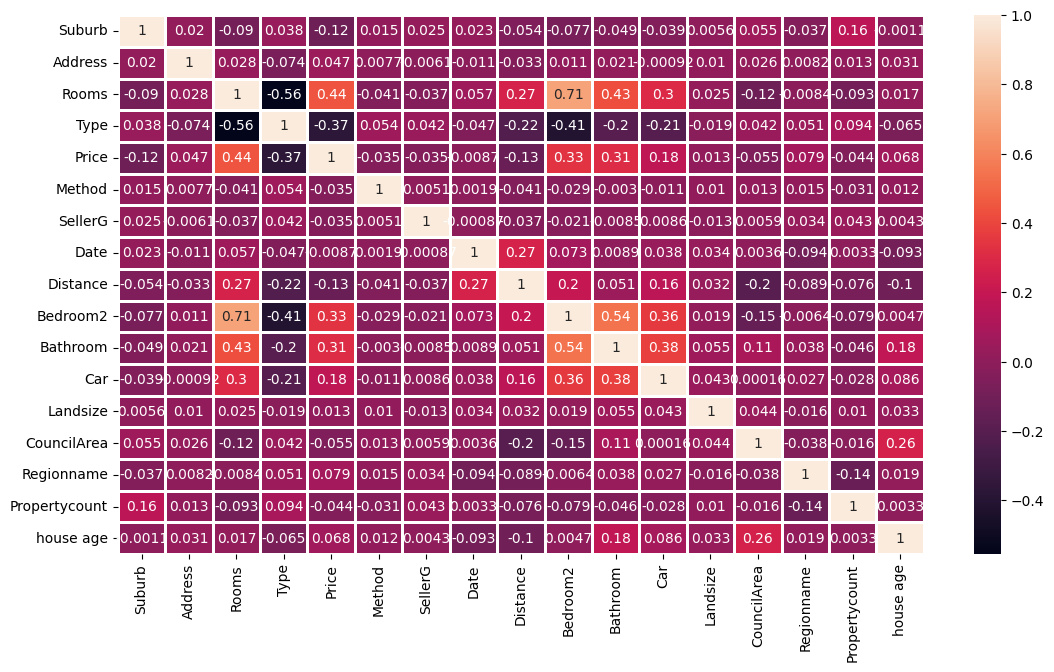

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(),annot=True,linewidth=1)


***Feature Selection and Data Preparation:***

*We drop some features ("house age," "Landsize," "Propertycount," "Date," "SellerG," "Address," "Method," "Regionname") that are not considered for modeling.

*We separate the independent features (X) and the dependent variable (y) "Price" for our regression task.
We use the StandardScaler to scale the independent features to have zero mean and unit variance.

In [ ]:
df=df.drop(["house age","Landsize","Propertycount","Date","SellerG","Address","Method","Regionname"],axis=1)

X= df.drop("Price", axis=1)
y=df["Price"]
df

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea
0,0,2,0,1.054957e+06,2.5,3067.0,2.0,1.0,1.0,31
1,0,2,0,1.480000e+06,2.5,3067.0,2.0,1.0,1.0,31
2,0,2,0,1.035000e+06,2.5,3067.0,2.0,1.0,0.0,31
3,0,3,2,1.054957e+06,2.5,3067.0,3.0,2.0,1.0,31
4,0,3,0,1.465000e+06,2.5,3067.0,3.0,2.0,0.0,31
...,...,...,...,...,...,...,...,...,...,...
19735,323,2,2,5.600000e+05,4.6,3181.0,3.0,1.0,1.0,29
19736,324,3,0,5.253000e+05,25.5,3750.0,3.0,2.0,2.0,6
19737,329,2,0,7.500000e+05,6.3,3013.0,3.0,2.0,2.0,6
19738,329,6,0,2.450000e+06,6.3,3013.0,3.0,2.0,1.0,11


*reasons for dropping these features*:
1.   Correlation with Target Feature
2.   Multicollinearity
3.   Relevance to the Task
4.   Data Availability: In some cases, features like "Date," "SellerG," "Address," and "Method" may not be directly related to the target variable and may not have been transformed into meaningful numerical values. In this scenario, they might be dropped as they are not usable for modeling.





In [ ]:
le=StandardScaler()
X=le.fit_transform(X)
df

,Suburb,Rooms,Type,Price,Distance,Postcode,Bedroom2,Bathroom,Car,CouncilArea
0,0,2,0,1.054957e+06,2.5,3067.0,2.0,1.0,1.0,31
1,0,2,0,1.480000e+06,2.5,3067.0,2.0,1.0,1.0,31
2,0,2,0,1.035000e+06,2.5,3067.0,2.0,1.0,0.0,31
3,0,3,2,1.054957e+06,2.5,3067.0,3.0,2.0,1.0,31
4,0,3,0,1.465000e+06,2.5,3067.0,3.0,2.0,0.0,31
...,...,...,...,...,...,...,...,...,...,...
19735,323,2,2,5.600000e+05,4.6,3181.0,3.0,1.0,1.0,29
19736,324,3,0,5.253000e+05,25.5,3750.0,3.0,2.0,2.0,6
19737,329,2,0,7.500000e+05,6.3,3013.0,3.0,2.0,2.0,6
19738,329,6,0,2.450000e+06,6.3,3013.0,3.0,2.0,1.0,11


**Train-Test Split:**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=4,test_size=0.3)
y

0        1.054957e+06
1        1.480000e+06
2        1.035000e+06
3        1.054957e+06
4        1.465000e+06
             ...     
19735    5.600000e+05
19736    5.253000e+05
19737    7.500000e+05
19738    2.450000e+06
19739    6.450000e+05
Name: Price, Length: 19740, dtype: float64

**Polynomial Feature Transformation:**

*We use PolynomialFeatures to create second-degree polynomial features from the original independent features.

*This allows us to capture non-linear relationships between the features and the target variable.


---


linear Regression with Polynomial Features:

*We fit a Linear Regression model on the transformed data (X_train_poly) and the target variable (y_train).
We predict the target variable (y_pred_poly) for the test set (X_test_poly).
We calculate evaluation metrics (MAE, MSE, RMSE, R2 score) to assess the performance of the Linear Regression model with polynomial features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)
X_train_poly=poly_features.fit_transform(X_train)
X_test_poly=poly_features.transform(X_test)
lr=LinearRegression()
lr.fit(X_train_poly,y_train)
y_pred_poly=lr.predict(X_test_poly)
y_pred_poly

print("mean_absolute_error",mean_absolute_error(y_test,y_pred_poly))
print("mean_squared_error_poly",mean_squared_error(y_test,y_pred_poly))
print("nqrt_mean_squared_error",np.sqrt(mean_squared_error(y_test,y_pred_poly)))
r2_score(y_test,y_pred_poly)


mean_absolute_error 287481.76776628854
mean_squared_error_poly 187929444547.09027
nqrt_mean_squared_error 433508.2981294479


0.4151294935123745

**Model Comparison** - *Multiple Regression Algorithms:*

*We implement and train several regression models, including DecisionTreeRegressor, RandomForestRegressor, SVR, AdaBoostRegressor, and XGBRegressor.

*For each model, we calculate predictions (y_predi) for the test set and a new data point [0, 2, 0, 2.5, 3067.0, 2.0, 1.0, 1.0, 31].

*We evaluate each model's performance using MAE, MSE, RMSE, and R2 score and compare their results.

In [ ]:

lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
svr=SVR()
ad=AdaBoostRegressor()
import xgboost as xgb
gb = xgb.XGBRegressor(verbosity=0)
lst3=[lr,dt,rf,svr,ad,gb]
for i in lst3:
  i.fit(X_train,y_train)
  y_predi=i.predict(X_test)
  y_new=i.predict([[0,	2,	0,	2.5,	3067.0,	2.0,	1.0,	1.0,	31]])
  print("y_new of",i,y_new)
  print("mean_absolute_error of",i,"is",mean_absolute_error,(y_test,y_predi))
  print("mean_squared_error of",i,"is",mean_squared_error(y_test,y_predi))
  print("sqrt of mean_squared_error of",i,"is",np.sqrt(mean_squared_error(y_test,y_predi)))
  print("r2score",i,r2_score(y_test,y_predi))

y_new of LinearRegression() [4.09424099e+08]
mean_absolute_error of LinearRegression() is <function mean_absolute_error at 0x7f84e78109d0> (4700     5.295000e+05
3375     1.054957e+06
5676     1.100000e+06
5120     2.160000e+06
11783    2.410000e+05
             ...     
15113    1.680000e+06
5233     1.000000e+06
13957    1.165000e+06
15545    4.212000e+05
5487     7.250000e+05
Name: Price, Length: 5922, dtype: float64, array([ 616551.0913339 , 1578116.88112093, 1117798.63048048, ...,
       1417548.45700312,  734593.17641407, 1032277.98325752]))
mean_squared_error of LinearRegression() is 203669025491.28778
sqrt of mean_squared_error of LinearRegression() is 451297.0479532165
r2score LinearRegression() 0.3661450637391619
y_new of DecisionTreeRegressor() [1054957.35658613]
mean_absolute_error of DecisionTreeRegressor() is <function mean_absolute_error at 0x7f84e78109d0> (4700     5.295000e+05
3375     1.054957e+06
5676     1.100000e+06
5120     2.160000e+06
11783    2.410000e+05
     

**Additional Regression Algorithms Comparison:**

*We try additional regression algorithms, such as Lasso, GaussianProcessRegressor, KNeighborsRegressor, ElasticNet, and Ridge.

*For each model, we calculate predictions (y_predit) for the test set and the same new data point [0, 2, 0, 2.5, 3067.0, 2.0, 1.0, 1.0, 31].

*We evaluate each model's performance using MAE, MSE, RMSE, and R2 score and compare their results.

In [ ]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
ls= Lasso(alpha=1.0)  # You can adjust the regularization parameter (alpha) as needed
kernel = RBF()
gn = GaussianProcessRegressor(kernel=kernel)
knn = KNeighborsRegressor(n_neighbors=5)
elastic= ElasticNet(alpha=1.0, l1_ratio=0.5)
ridge=Ridge(alpha=1.0)
lst4=[ls,gn,knn,elastic,ridge]
for i in lst4:
  i.fit(X_train,y_train)
  y_predit=i.predict(X_test)
  y_new=i.predict([[0,	2,	0,	2.5,	3067.0,	2.0,	1.0,	1.0,	31]])
  print(" y_new of",i, y_new)
  print("mean_absolute_error of", i, "is", mean_absolute_error(y_test, y_predit))
  print("mean_squared_error of", i, "is", mean_squared_error(y_test, y_predit))
  print("sqrt of mean_squared_error of", i, "is", np.sqrt(mean_squared_error(y_test, y_predit)))
  print("r2score", i, r2_score(y_test, y_predit))


 y_new of Lasso() [4.09418856e+08]
mean_absolute_error of Lasso() is 306808.74770679645
mean_squared_error of Lasso() is 203668964672.26056
sqrt of mean_squared_error of Lasso() is 451296.980570733
r2score Lasso() 0.36614525301900225


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


 y_new of GaussianProcessRegressor(kernel=RBF(length_scale=1)) [0.]
mean_absolute_error of GaussianProcessRegressor(kernel=RBF(length_scale=1)) is 569752.6812801505
mean_squared_error of GaussianProcessRegressor(kernel=RBF(length_scale=1)) is 688709525898.689
sqrt of mean_squared_error of GaussianProcessRegressor(kernel=RBF(length_scale=1)) is 829885.2486330197
r2score GaussianProcessRegressor(kernel=RBF(length_scale=1)) -1.1433889202726077
 y_new of KNeighborsRegressor() [694991.47131723]
mean_absolute_error of KNeighborsRegressor() is 290163.172166536
mean_squared_error of KNeighborsRegressor() is 198660310863.32025
sqrt of mean_squared_error of KNeighborsRegressor() is 445713.2608116122
r2score KNeighborsRegressor() 0.3817330918332763
 y_new of ElasticNet() [1.9188963e+08]
mean_absolute_error of ElasticNet() is 311883.0728379066
mean_squared_error of ElasticNet() is 217864685997.6009
sqrt of mean_squared_error of ElasticNet() is 466759.7733284231
r2score ElasticNet() 0.3219655943097

Mean Absolute Error of XGBRegressor(): 708,768.6

Mean Squared Error of XGBRegressor(): 191,162,496,273.412

Square Root of Mean Squared Error of XGBRegressor(): 437,221.3356
Based on the mean absolute error (MAE) and mean squared error (MSE) values, we can see that the best algorithm is XGBRegressor. Its MAE of 708,768.6 and MSE of 191,162,496,273.412 indicate better performance compared to other algorithms. Additionally, the square root of MSE for XGBRegressor is 437,221.3356, which is lower than other algorithms.